In [102]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
# The code was removed by DSX for sharing.

,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,PistoneCpx,Inerzia,Vmax,...,183,184,185,186,187,188,189,190,191,192
0,1.000000,0.900208,0.880503,0.673423,0.677704,0.129032,0.062284,1,0.272727,0.434783,...,0.539481,0.534210,0.740648,0.438179,0.516201,0.320636,0.623794,0.298908,0.689731,0.515836
1,0.997764,0.919958,0.805031,0.675676,0.631347,0.206452,0.159170,1,0.272727,0.434783,...,0.675487,0.691069,0.701569,0.363226,0.450055,0.331382,0.711773,0.343537,0.808774,0.616340
2,0.996452,0.980249,0.440252,0.801802,0.779249,0.218280,0.156863,1,0.272727,0.434783,...,0.539481,0.534210,0.740648,0.438179,0.516201,0.320636,0.623794,0.298908,0.689731,0.515836
3,0.996452,0.977131,0.427673,0.774775,0.854305,0.246237,0.222607,1,0.272727,0.434783,...,0.539481,0.534210,0.740648,0.438179,0.516201,0.320636,0.623794,0.298908,0.689731,0.515836
4,0.995529,0.944906,0.786164,0.641892,0.635762,0.118280,0.071511,1,0.272727,0.434783,...,0.613546,0.546417,0.741318,0.444433,0.520374,0.323024,0.615110,0.295961,0.698293,0.475325


In [104]:
print "Number of unique target classes: " +  str(len(df_data_1["Material"].unique()))
print "Dimensionality of the merged data: " + str(df_data_1.shape)

Number of unique target classes: 482
Dimensionality of the merged data: (651, 235)


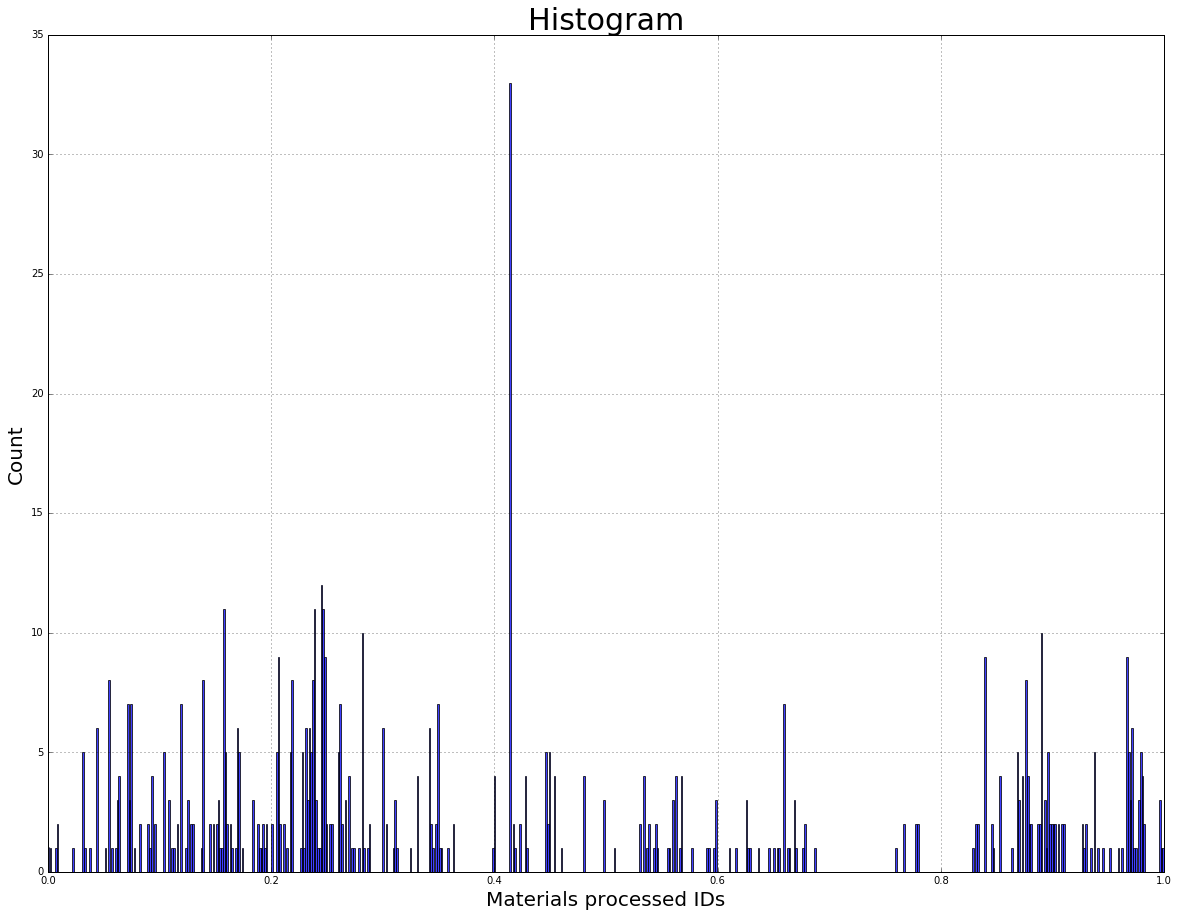

In [105]:
x = df_data_1["Material"].values

plt.hist(x, 651, facecolor='blue', alpha=0.75)

plt.title('Histogram', fontsize=30)
plt.xlabel('Materials processed IDs', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid(True)

plt.show()

In [110]:
col_set = set()
count = 0
for val in df_data_1["Material"].values:
    if len(df_data_1.loc[df_data_1["Material"] == val]) == 1:
        col_set.add(val)
        count = count + 1

#df_data_1[~df_data_1["Material"].isin(col_set)]

print "There are " + str(len(col_set)) + " rows with an unique value of the \"Material\" column, that is the " + str(float(len(col_set)/df_data_1.shape[0]))

There are 398 rows with an unique value of the "Material" column, that is the 0.0


In [112]:
print floatlen(col_set)/df_data_1.shape[0]

0


In [117]:
X = df_data_1.values
y = df_data_1["Material"].values

(651,)

In [1]:
from sklearn.cross_validation import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(y, 1, test_size=.30, random_state=0)

for train_index, test_index in sss:
    print "TRAIN indices:", train_index, ", TEST indices:", test_index 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print "TRAIN-set shape:" + str(X_train.shape) + ", TEST-set shape:" + str(X_test.shape)

NameError: name 'y' is not defined

In [ ]:
from sklearn.cross_validation import StratifiedKFold
skf = StratifiedKFold(y_train, n_folds=3)

for cv_train_index, cv_val_index in skf:
    print("TRAIN-fold indices: ", cv_train_index, ", TEST-fold indices: ", cv_val_index)
    X_cv_train, X_cv_val = X_train[cv_train_index], X_train[cv_val_index]
    y_cv_train, y_cv_val = y_train[cv_train_index], y_train[cv_val_index]
    print "TRAIN-fold shape:" + str(X_cv_train.shape) + "VAL-fold shape:" + str(X_cv_val.shape)